# Observed $<log L>$ vs. ${}$ $log <L>$ 
**in the protein coding gene/protein length distributions for the different species**

## Import python modules

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from scipy import stats
import sys
sys.path.append('../../gl_lib/')
import gl_constants as c

BOOL_GENES_OR_PROTEINS = "GENES" # GENES or PROTEINS

## The length distributions for the different species

### Retrieving the statistical descriptions of the length's distributions

#### Statistical description 

In [14]:
# statistics on length distributions 
if BOOL_GENES_OR_PROTEINS == "GENES":
    stat_file = c.STAT_G_FILE
elif BOOL_GENES_OR_PROTEINS == "PROTEINS":
    stat_file = c.STAT_P_FILE
print("The statistical descriptions of the distributions is in:\n", \
    stat_file, "\n")

# retrieve data and diminish the number of columns
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
stat_df = stat_df[["division_both_dbs", "species", "count", "mean", "log10_mean"]]
stat_df = stat_df.rename(columns={'log10_mean': 'mean_of_log10'})

# visualize data
if 1:
    pd.set_option('display.max_columns', len(stat_df.columns))
    display(stat_df.sample(2))
    print(stat_df.shape)
    print(stat_df["division_both_dbs"].value_counts())

The statistical descriptions of the distributions is in:
 /home/emuro/git/github/borrador/main_work/suppl_work/../../gl_lib/../main_tables/stat_protCodGenes.tsv 



,division_both_dbs,species,count,mean,mean_of_log10
26163,bacteria,roseobacter_sp__gca_002731875,3945,929.666413,2.883663
3015,bacteria,escherichia_coli_gca_002263825,5012,851.274342,2.815221


(33627, 5)
division_both_dbs
bacteria         30714
archaea           1229
fungi             1014
protists           237
vertebrates        222
invertebrates      115
plants              96
Name: count, dtype: int64


## $<log L>$ vs. ${}$ $log <L>$; represented in $log$ (or $ln$) scale

Prepare the plot

In [15]:
df2plot = stat_df
df2plot["mean_of_ln"]    = df2plot["mean_of_log10"] * (1/np.log10(np.exp(1)))
df2plot["ln_of_mean"]    = np.log(df2plot["mean"])
if BOOL_GENES_OR_PROTEINS == "GENES":
    title = "Protein coding genes"
elif BOOL_GENES_OR_PROTEINS == "PROTEINS":
    title = "Proteins" # "Uniprot, reference Proteomes (protein length)"

col_x = "mean_of_ln"  
x_lab = "$<ln L>$"  
col_y = "ln_of_mean"  
y_lab = "$ln <L>$"
legends_by = "division_both_dbs"

bool_show_regression = True
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(df2plot[col_x].to_list(), df2plot[col_y].to_list(), 1)

from scipy import stats
#slope, intercept, r_value, p_value, std_err = \
m, b, r_value, p_value, std_err = \
    stats.linregress(df2plot[col_x], df2plot[col_y])
   ##stats.linregress(np.log10(df2plot[col_x]),np.log10(df2plot[col_y]))
print(f"m = {m}, b={b}") 
in_txt = '$R^{2}$ = ' + '{:2.4f}'.format(r_value**2)
print(in_txt) 

# Sort division_both_dbs in order to plot the color of the clades in order
if 0:
    print(df2plot.division_both_dbs.unique())
df2plot.division_both_dbs = pd.Categorical(df2plot.division_both_dbs, 
                                categories=c.ORG_GROUPS,           
                                ordered=True)
df2plot.sort_values('division_both_dbs', inplace=True)

m = 1.2013092120587274, b=-1.1115558570211972
$R^{2}$ = 0.9680


Finally, plot it

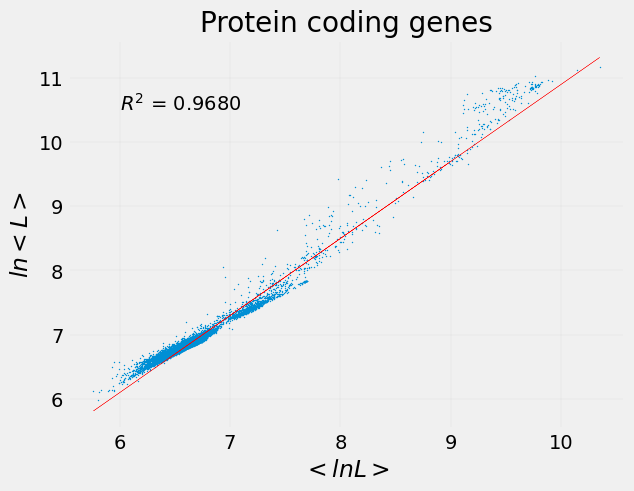

In [16]:
plt.style.use('fivethirtyeight')
plt.grid(True, linewidth=0.15)
plt.scatter(col_x, col_y, s=0.25, data=df2plot) #c='c', s='d'
if bool_show_regression:
    df2plot["regression_line"] = m * df2plot[col_x] + b 
    plt.plot(df2plot[col_x].to_list(), df2plot["regression_line"].to_list(), c='red', linewidth=0.25)
    plt.text(6, 10.5, in_txt) 
plt.xlabel(x_lab)
plt.ylabel(y_lab)
plt.title(title)
plt.show()